In [496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import label_binarize


In [498]:
import warnings
warnings.filterwarnings("ignore")

In [500]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [504]:
minmax_scaler = MinMaxScaler()

X_train_scaled = minmax_scaler.fit_transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)  

In [506]:
X_train_abs = np.abs(X_train)
X_test_abs = np.abs(X_test)

In [508]:
robust_scaler = RobustScaler()

X_scaled = robust_scaler.fit_transform(X)

In [510]:
df = pd.DataFrame(X, columns=diabetes.feature_names)

df["target"] = y
print(df.head())

print(f"Dataset shape: {df.shape}")
print("\nfeature names:")
print(diabetes.feature_names)


        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
Dataset shape: (442, 11)

feature names:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [271]:
print("summary statistics:")
print(df.describe())

summary statistics:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-

In [243]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [163]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [165]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [167]:
print(df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

In [171]:
df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [173]:
df.duplicated().sum()

0

In [175]:
null_counts = df.isnull().sum()
print(null_counts)

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64


In [177]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [179]:
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081413,0.083740,0.027809,0.173816,-0.039493,-0.004222,0.003064


In [181]:
df.shape

(442, 10)

In [183]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [185]:
df.describe().round(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00
std,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
min,-0.11,-0.04,-0.09,-0.11,-0.13,-0.12,-0.10,-0.08,-0.13,-0.14
25%,-0.04,-0.04,-0.03,-0.04,-0.03,-0.03,-0.04,-0.04,-0.03,-0.03
50%,0.01,-0.04,-0.01,-0.01,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00
75%,0.04,0.05,0.03,0.04,0.03,0.03,0.03,0.03,0.03,0.03
max,0.11,0.05,0.17,0.13,0.15,0.20,0.18,0.19,0.13,0.14


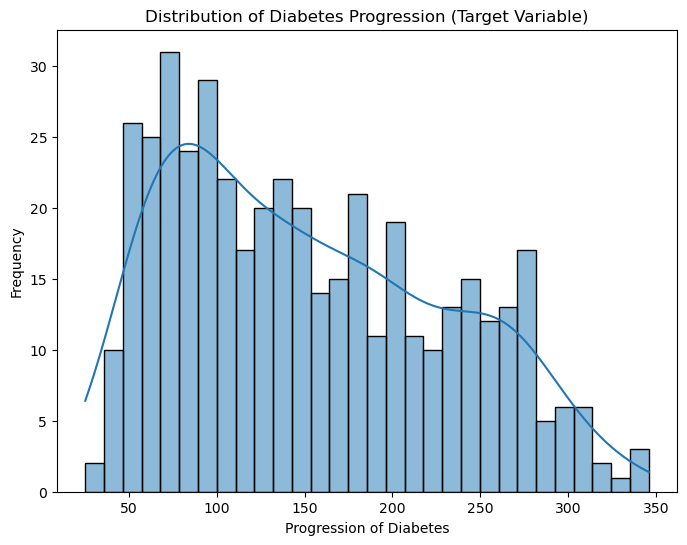

In [273]:
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], kde=True, bins=30)
plt.title('Distribution of Diabetes Progression (Target Variable)')
plt.xlabel('Progression of Diabetes')
plt.ylabel('Frequency')
plt.show()

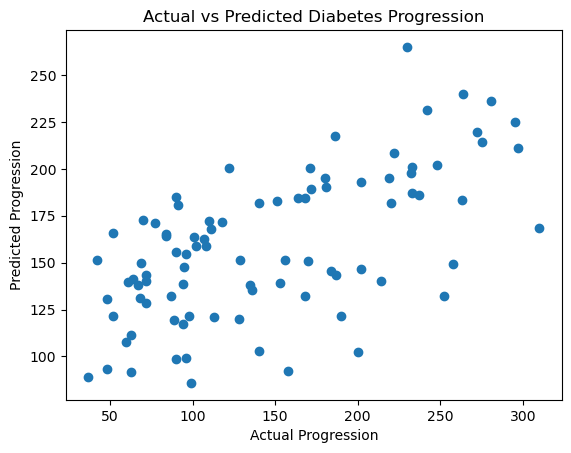

In [442]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Progression')
plt.ylabel('Predicted Progression')
plt.title('Actual vs Predicted Diabetes Progression')
plt.show()

<Figure size 1200x1000 with 0 Axes>

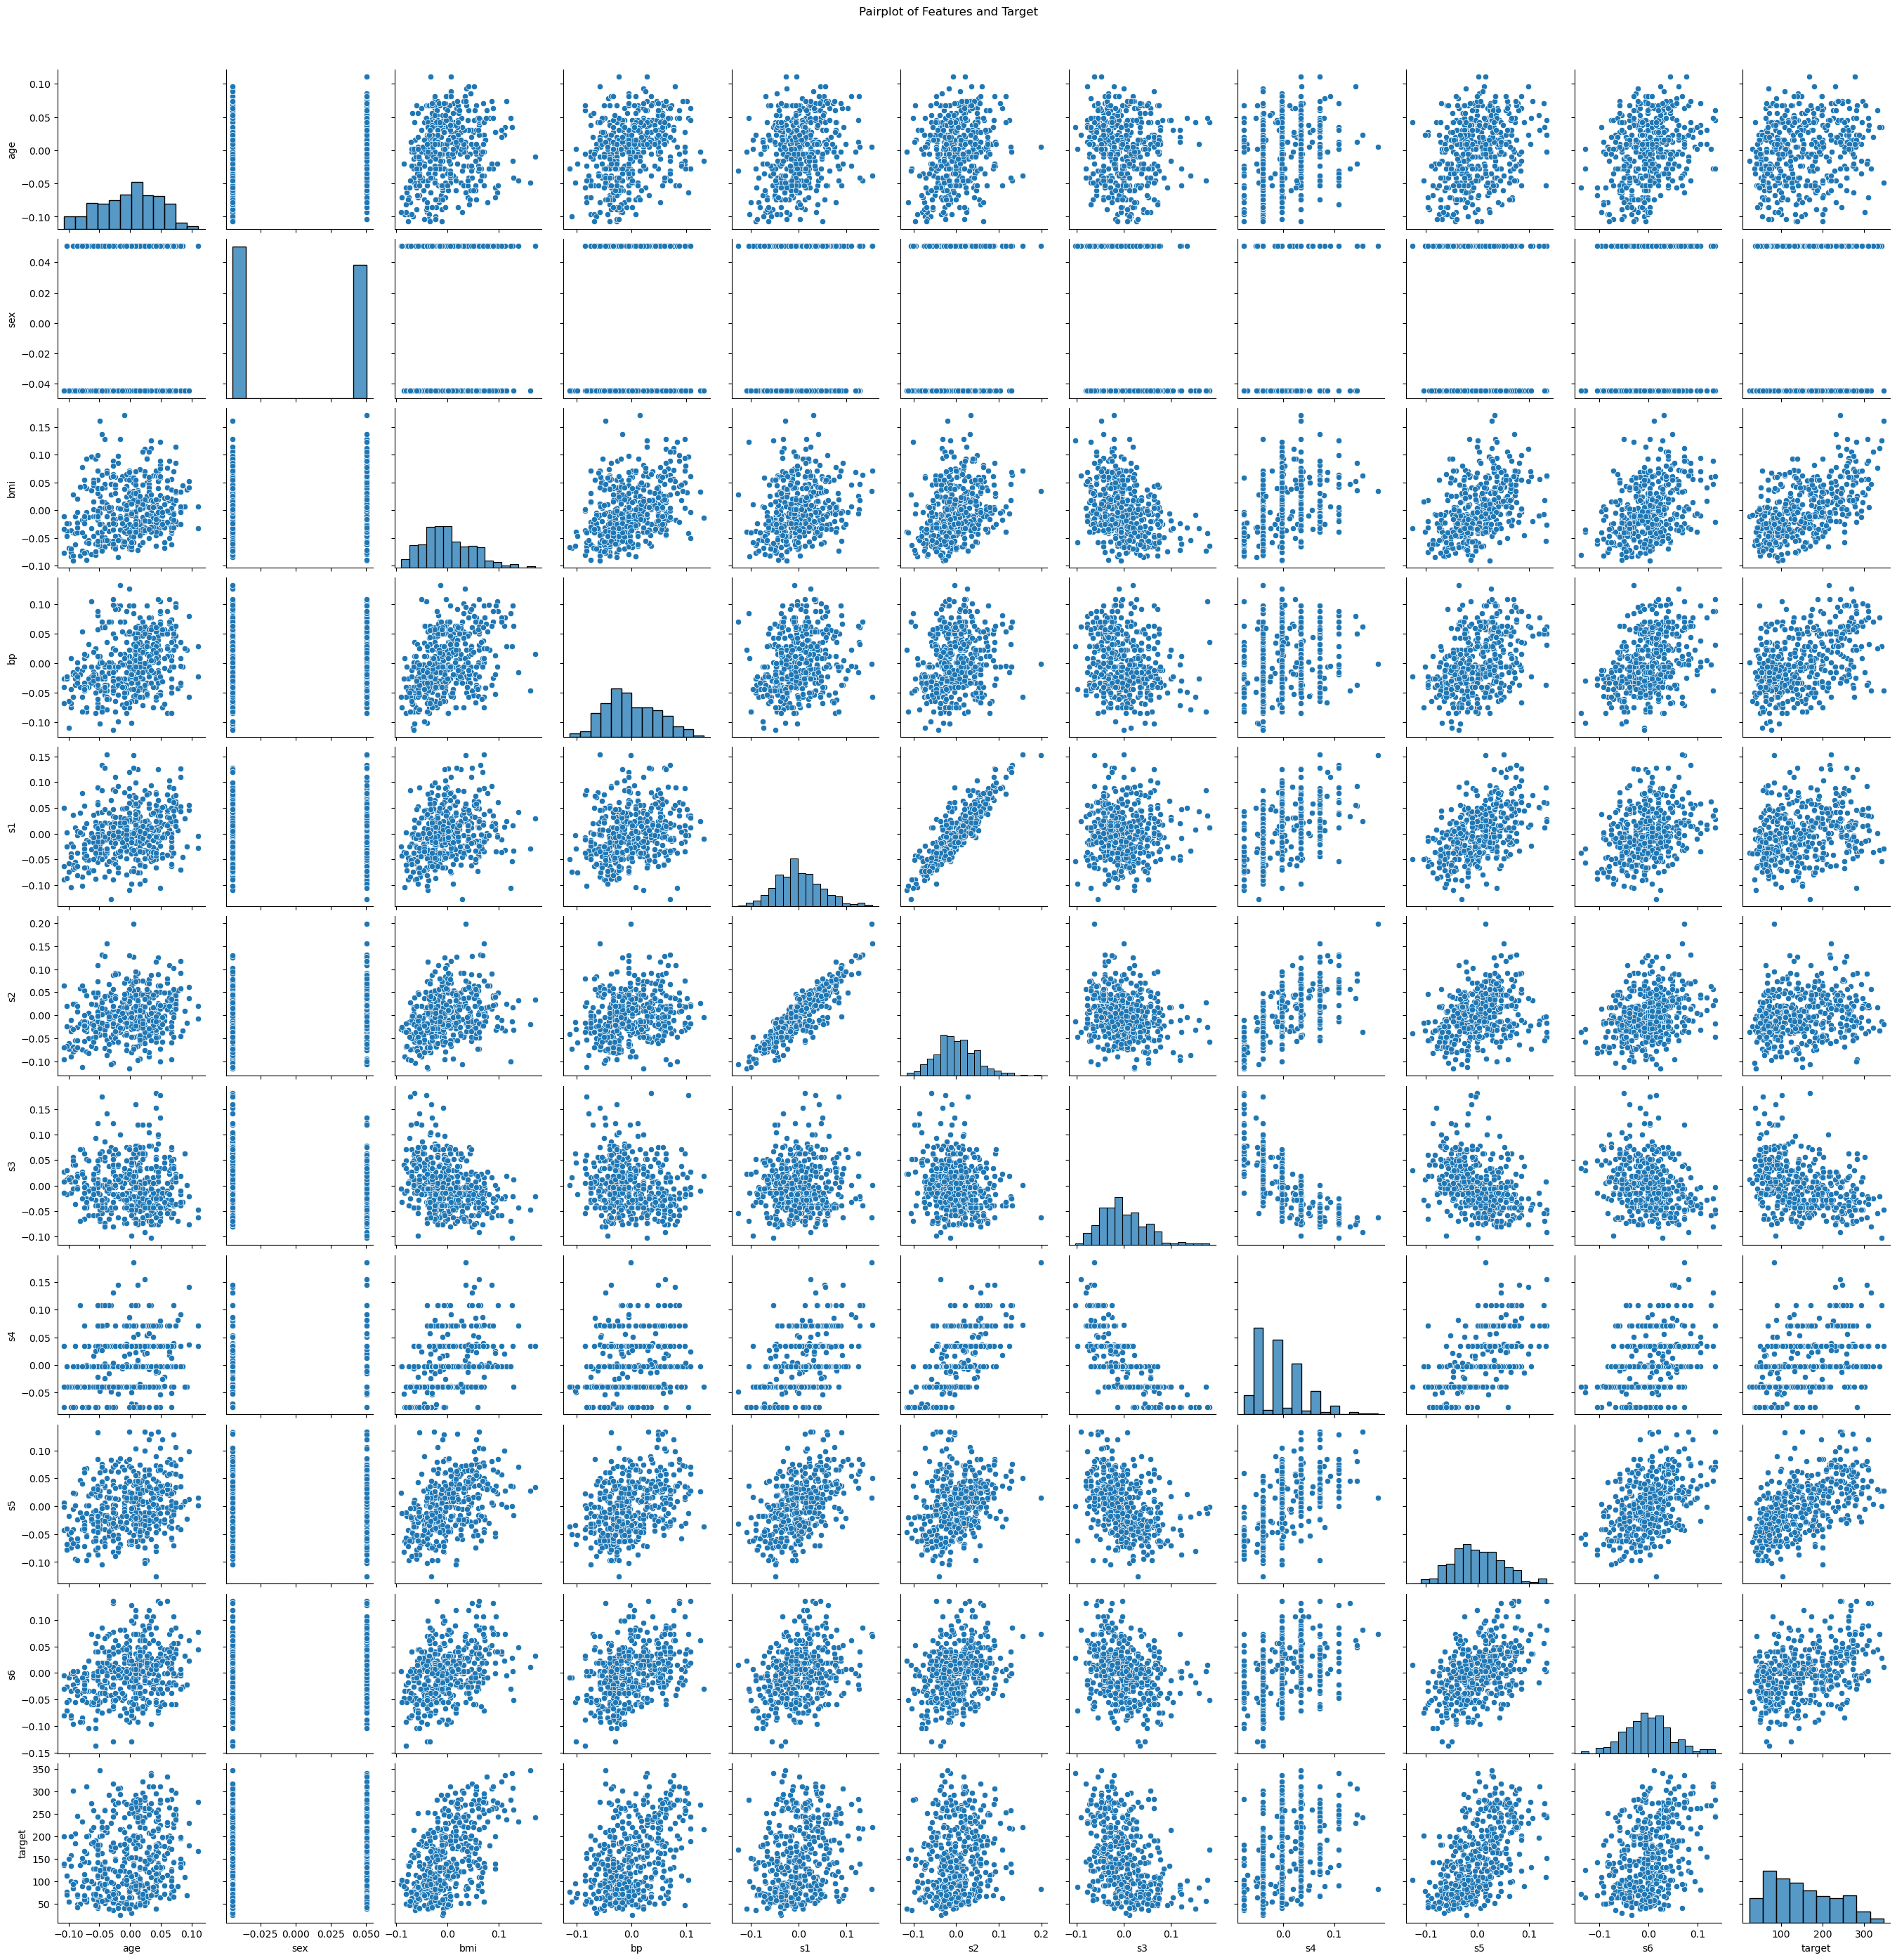

In [275]:
plt.figure(figsize=(12, 10))
sns.pairplot(df)
plt.suptitle('Pairplot of Features and Target', y=1.02)
plt.show()

In [279]:
correlation_matrix = df.select_dtypes(include="number").corr() 
correlation_matrix

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


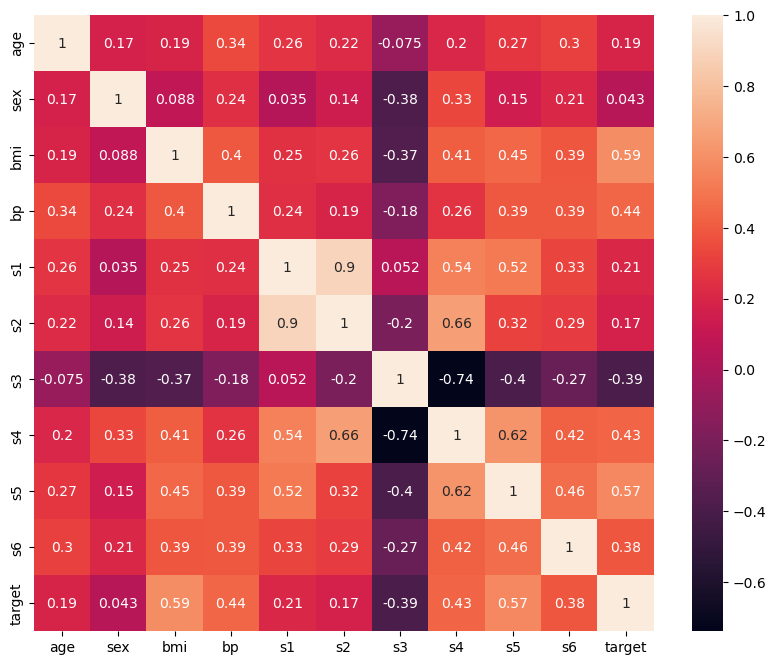

In [281]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

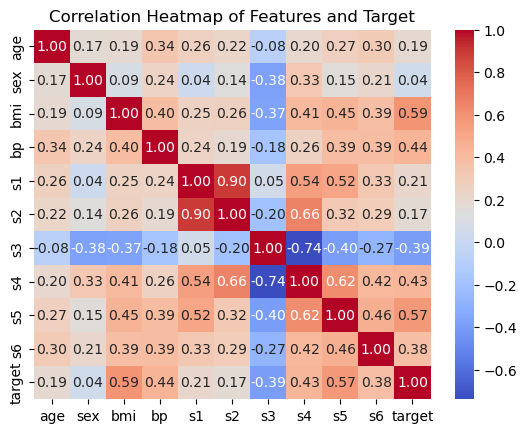

In [283]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features and Target')
plt.show()

In [452]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


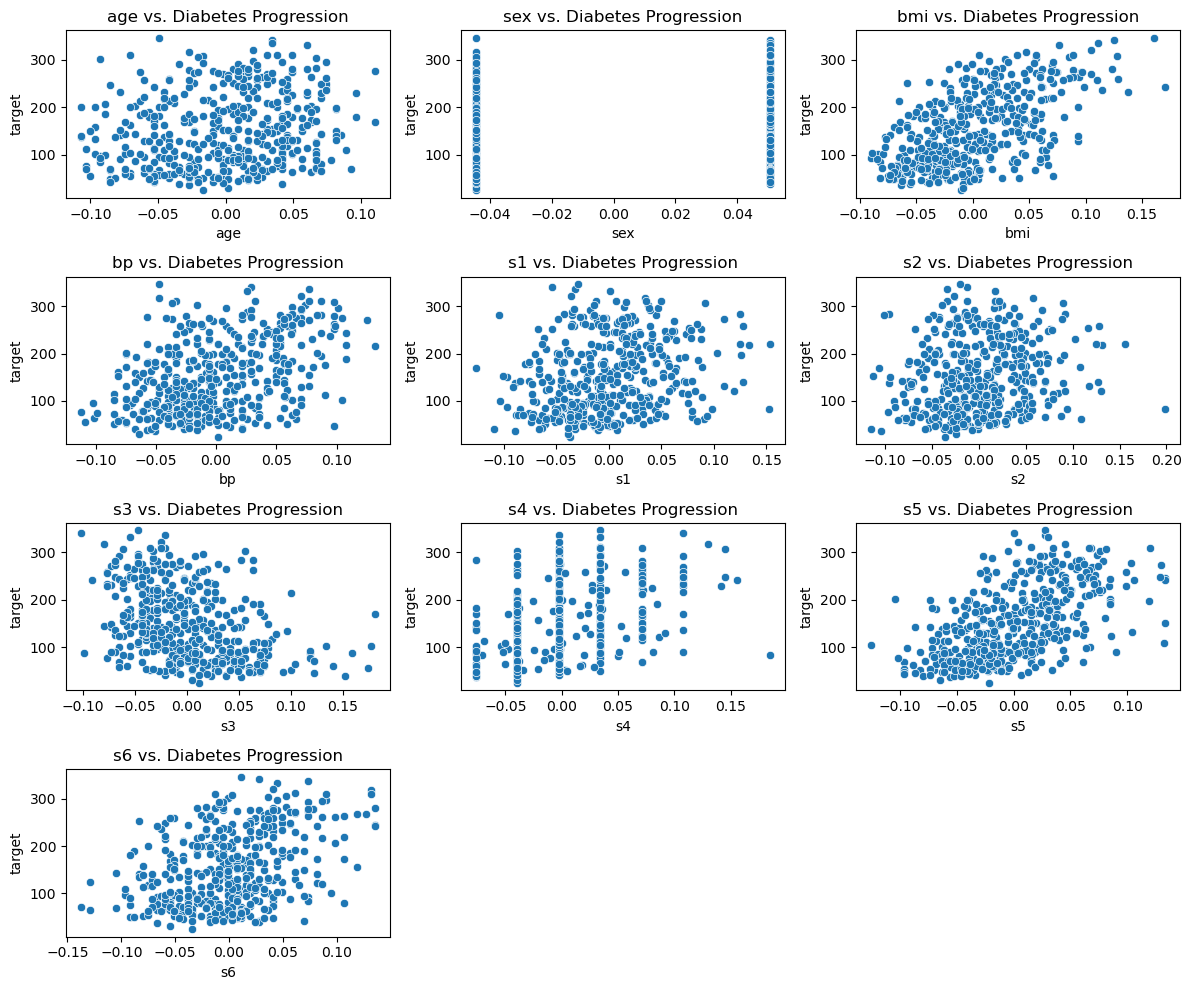

In [285]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(df.columns[:-1], 1):  
    plt.subplot(4, 3, i)
    sns.scatterplot(x=df[col], y=df['target'])
    plt.title(f'{col} vs. Diabetes Progression')
plt.tight_layout()
plt.show()

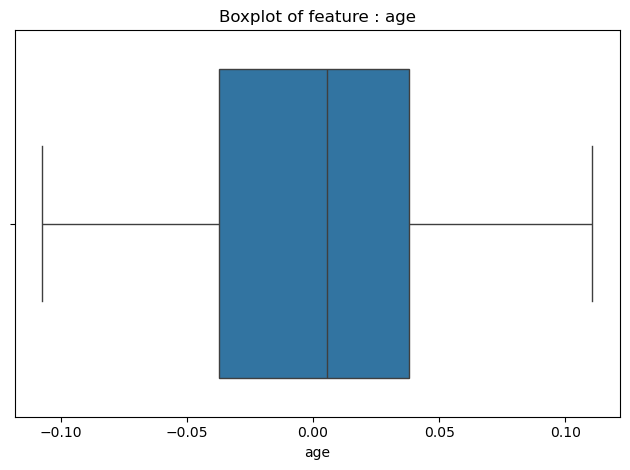

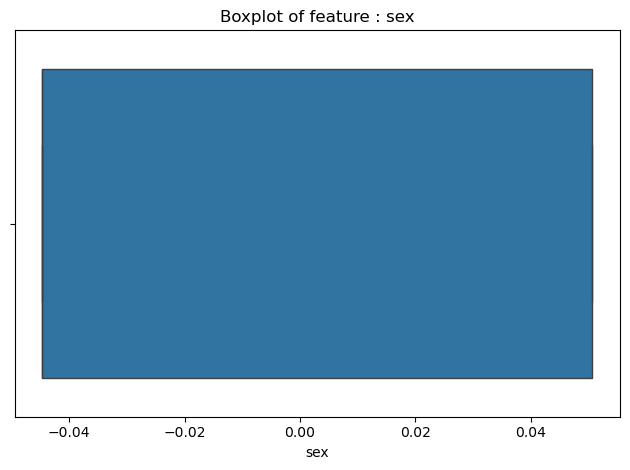

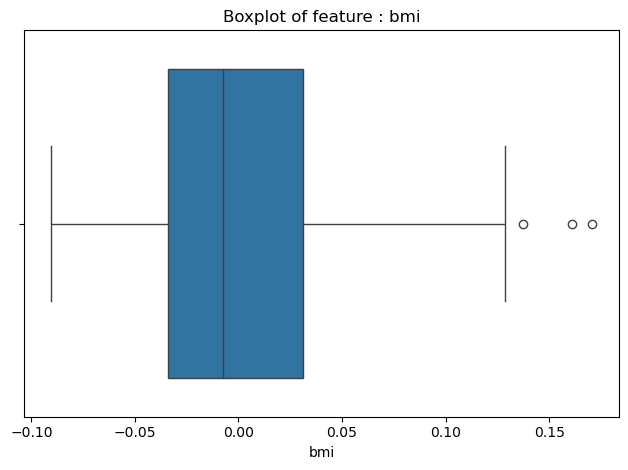

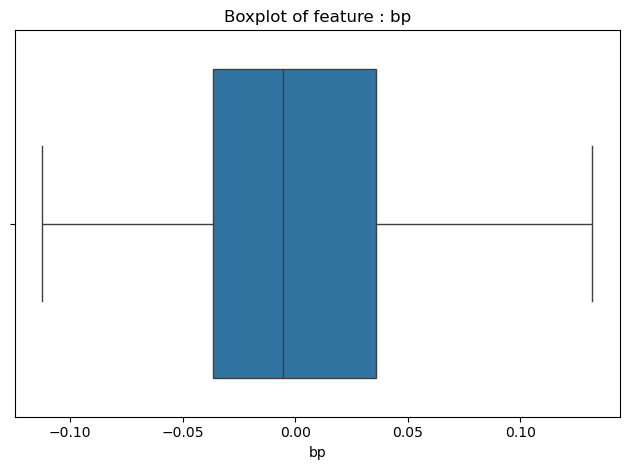

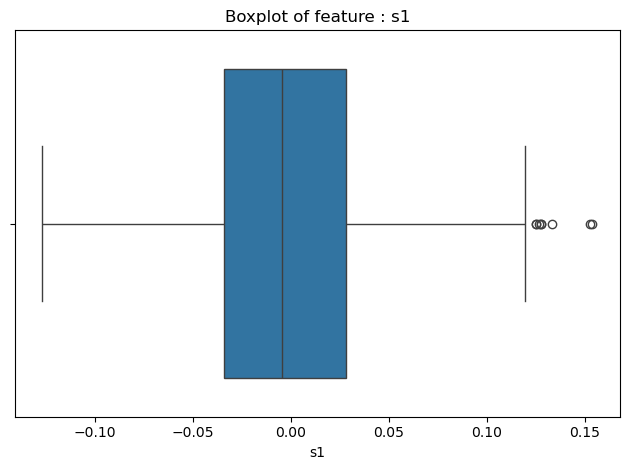

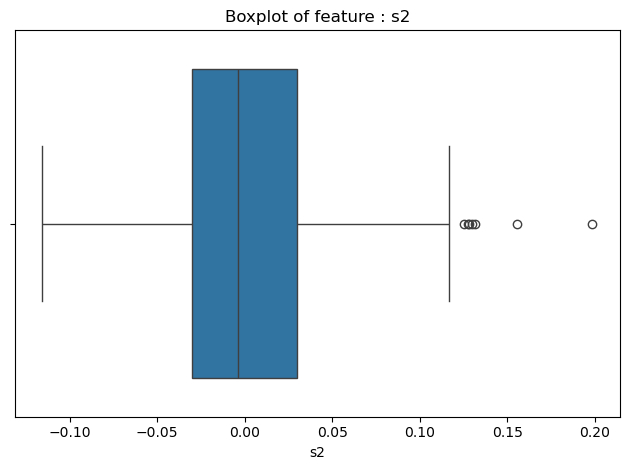

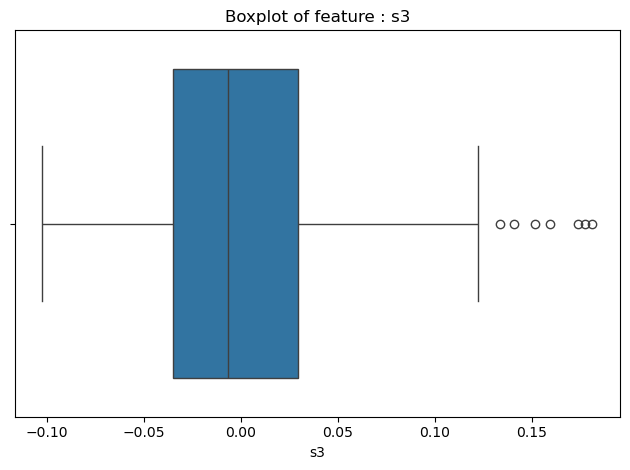

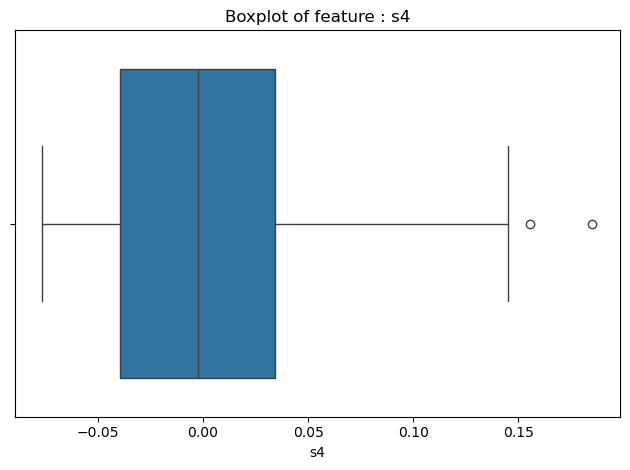

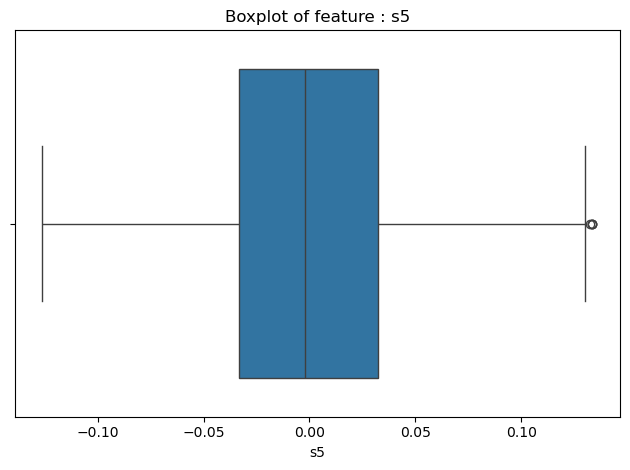

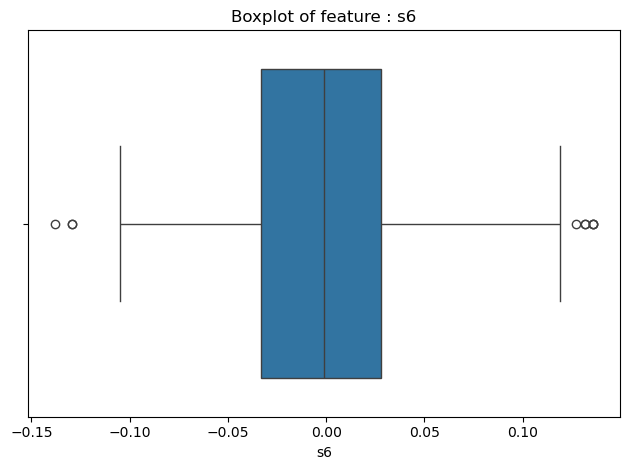

In [249]:
for column in df.select_dtypes(include="number").columns:
    if column == "Glucose":
        continue
    sns.boxplot(data=df, x=column)
    plt.title(f"Boxplot of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

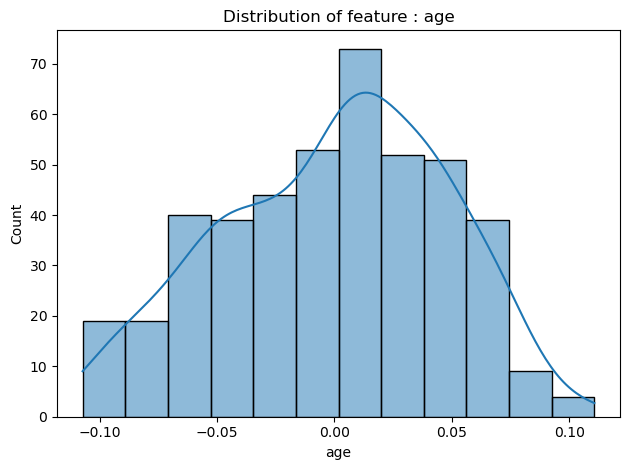

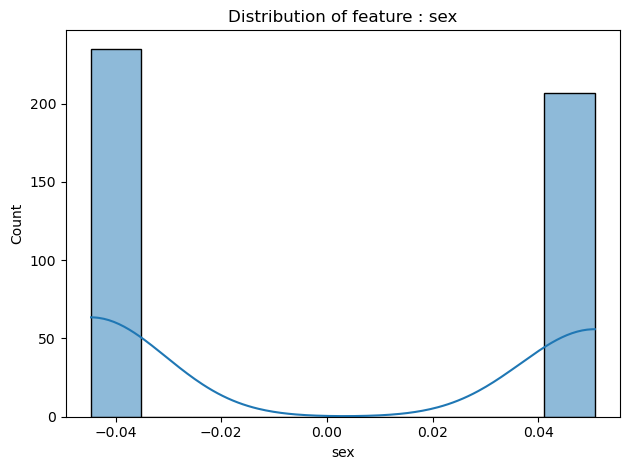

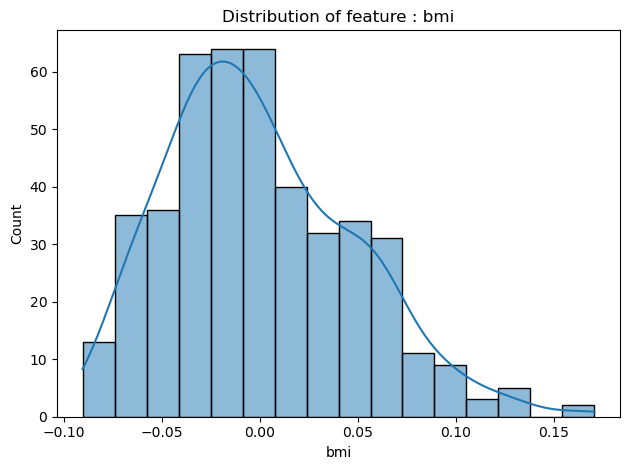

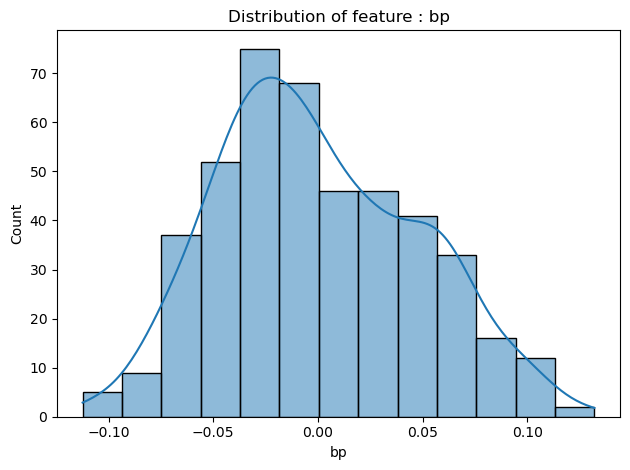

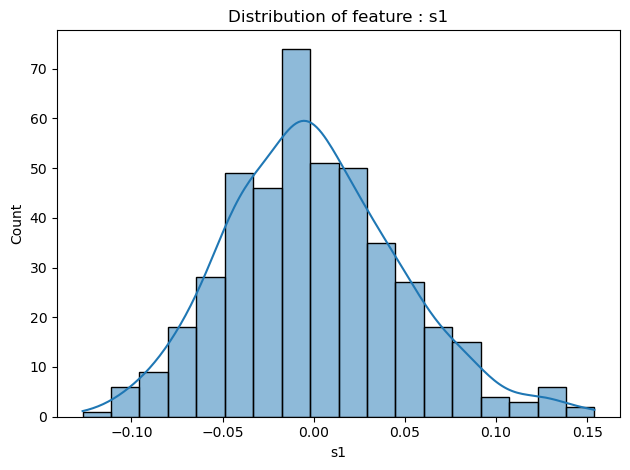

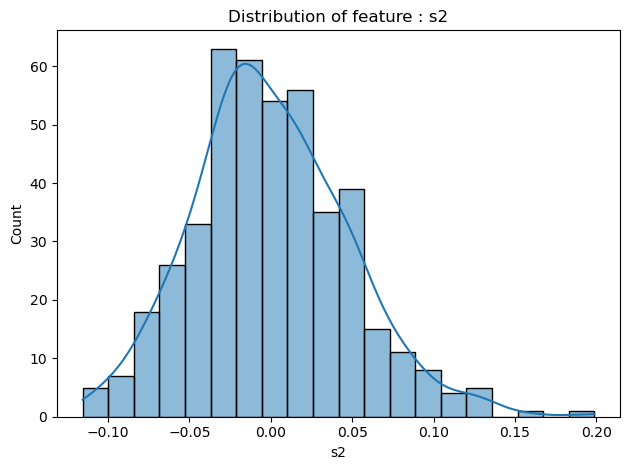

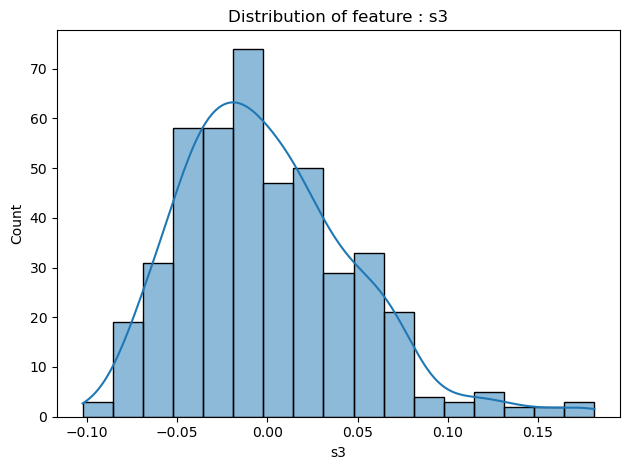

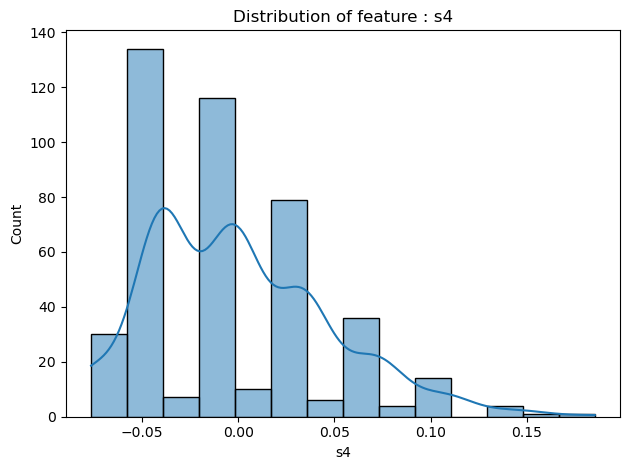

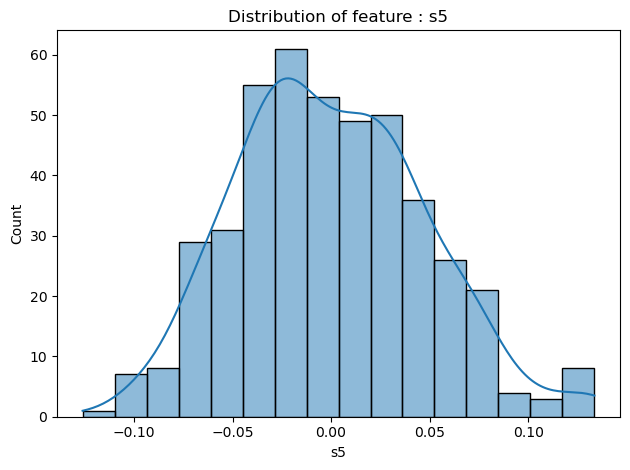

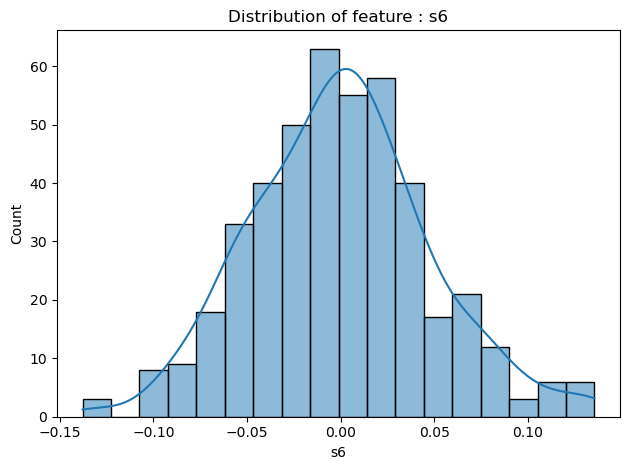

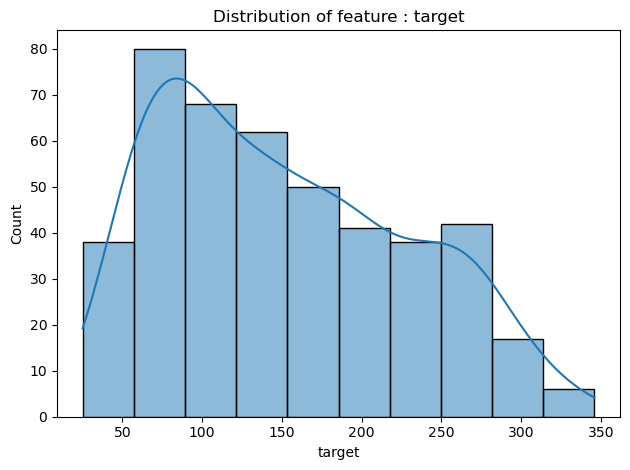

In [295]:
for column in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Distribution of feature : {column}")
    plt.tight_layout()
    plt.show()
    print("\n")

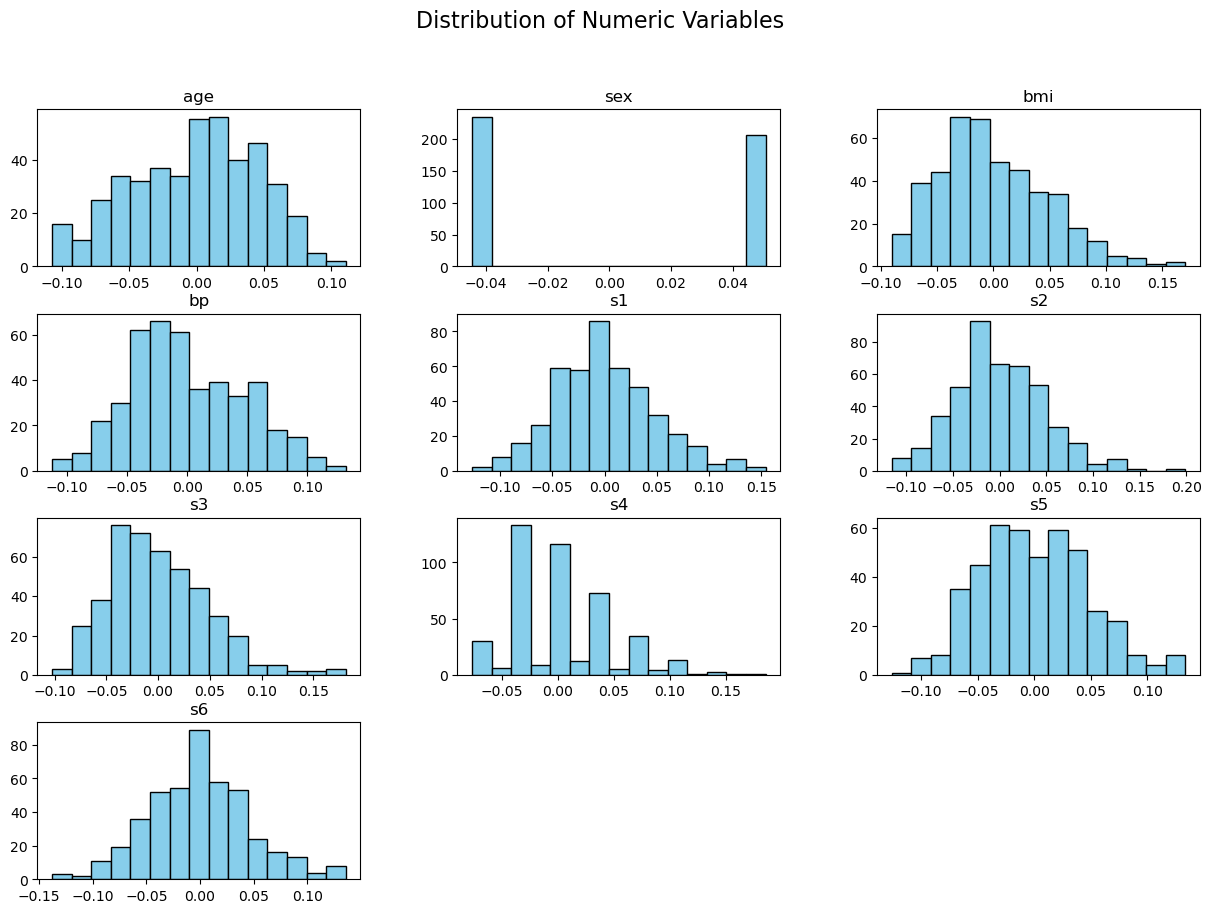

In [265]:
axes = df.hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numeric Variables', fontsize=16)

for ax in axes.flatten():
    ax.grid(False)

plt.show()

In [187]:
df.head()
df.dtypes
object_columns = df.select_dtypes(include="object").columns
print(object_columns)

if len(object_columns) > 0:
    df.describe(include="object")

else:
    print("No object columns found in the dataset.")

Index([], dtype='object')
No object columns found in the dataset.


In [189]:
df_no = df.select_dtypes(include=[np.number])
Q1 = df_no.quantile(0.25)
Q3 = df_no.quantile(0.75)
IQR = Q3 - Q1
df= df[~((df_no < (Q1 - 1.5 *IQR)) | (df_no > (Q3 + 1.5 * IQR))).any(axis=1)]

In [191]:
print(df.columns)
df.columns = df.columns.str.strip()
X = df.drop("age", axis=1) 
y = df["age"]
df = pd.get_dummies(df, drop_first=True, columns=[col for col in df.columns if col != "age"])

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')


In [193]:
diabetes = df["age"]. value_counts()
diabetes.reset_index()

,age,count
0,0.016281,19
1,0.009016,15
2,0.041708,15
3,-0.052738,13
4,0.067136,13
5,0.012648,13
6,0.030811,12
7,-0.005515,12
8,-0.027310,12
9,-0.001882,12


In [466]:
classifier = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [464]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 67. 219.]
 [ 90.  70.]
 [ 69. 202.]
 [248. 230.]
 [ 51. 111.]
 [ 95.  84.]
 [178. 242.]
 [100. 272.]
 [ 74.  94.]
 [ 53.  96.]
 [ 59.  94.]
 [ 93. 252.]
 [ 61.  99.]
 [120. 297.]
 [ 53. 135.]
 [ 44.  67.]
 [180. 295.]
 [163. 264.]
 [ 44. 170.]
 [129. 275.]
 [ 78. 310.]
 [ 59.  64.]
 [ 59. 128.]
 [144. 232.]
 [103. 129.]
 [178. 118.]
 [178. 263.]
 [ 91.  77.]
 [ 59.  48.]
 [ 51. 107.]
 [ 91. 140.]
 [ 69. 113.]
 [ 51.  90.]
 [ 91. 164.]
 [115. 180.]
 [178. 233.]
 [ 51.  42.]
 [ 51.  84.]
 [ 81. 172.]
 [ 65.  63.]
 [ 49.  48.]
 [ 66. 108.]
 [ 47. 156.]
 [ 89. 168.]
 [134.  90.]
 [ 59.  52.]
 [ 55. 200.]
 [ 64.  87.]
 [ 42.  90.]
 [ 93. 258.]
 [ 31. 136.]
 [ 51. 158.]
 [ 55.  69.]
 [ 49.  72.]
 [138. 171.]
 [103.  95.]
 [ 49.  72.]
 [127. 151.]
 [ 60. 168.]
 [ 59.  60.]
 [ 67. 122.]
 [ 78.  52.]
 [ 44. 187.]
 [ 65. 102.]
 [ 93. 214.]
 [ 67. 248.]
 [163. 181.]
 [ 53. 110.]
 [ 97. 140.]
 [ 58. 202.]
 [ 58. 101.]
 [122. 222.]
 [155. 281.]
 [ 58.  61.]
 [ 65.  89.]
 [138.  91.]
 [100. 186.]

In [468]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        25.0       0.00      0.00      0.00       0.0
        31.0       0.00      0.00      0.00       0.0
        37.0       0.00      0.00      0.00       1.0
        42.0       0.00      0.00      0.00       1.0
        44.0       0.00      0.00      0.00       0.0
        47.0       0.00      0.00      0.00       0.0
        48.0       0.00      0.00      0.00       2.0
        49.0       0.00      0.00      0.00       0.0
        51.0       0.00      0.00      0.00       0.0
        52.0       0.00      0.00      0.00       2.0
        53.0       0.00      0.00      0.00       0.0
        55.0       0.00      0.00      0.00       0.0
        57.0       0.00      0.00      0.00       0.0
        58.0       0.00      0.00      0.00       0.0
        59.0       0.00      0.00      0.00       0.0
        60.0   

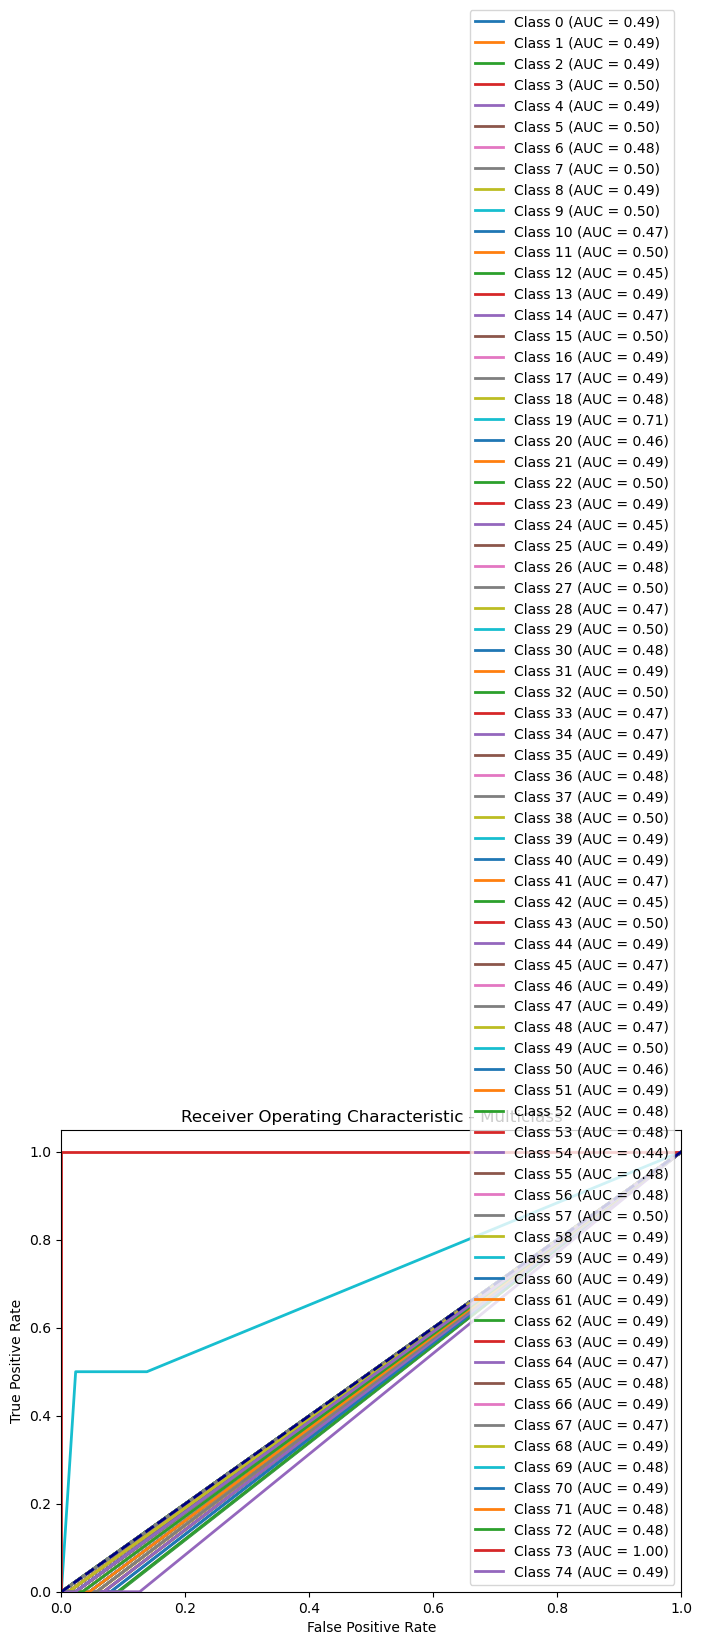

In [512]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
n_classes = y_test_bin.shape[1]

y_pred_prob = classifier.predict_proba(X_test) 

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Multiclass')
plt.legend(loc="lower right")
plt.show()


In [514]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [516]:
y_pred = log_reg.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))

[[200. 219.]
 [178.  70.]
 [178. 202.]
 [178. 230.]
 [178. 111.]
 [200.  84.]
 [178. 242.]
 [200. 272.]
 [ 71.  94.]
 [200.  96.]
 [200.  94.]
 [ 71. 252.]
 [ 71.  99.]
 [178. 297.]
 [ 71. 135.]
 [ 71.  67.]
 [178. 295.]
 [178. 264.]
 [ 71. 170.]
 [178. 275.]
 [200. 310.]
 [200.  64.]
 [ 71. 128.]
 [178. 232.]
 [200. 129.]
 [178. 118.]
 [178. 263.]
 [178.  77.]
 [ 71.  48.]
 [ 71. 107.]
 [200. 140.]
 [200. 113.]
 [ 71.  90.]
 [178. 164.]
 [200. 180.]
 [200. 233.]
 [ 71.  42.]
 [178.  84.]
 [178. 172.]
 [ 71.  63.]
 [ 71.  48.]
 [ 71. 108.]
 [ 71. 156.]
 [178. 168.]
 [200.  90.]
 [200.  52.]
 [ 71. 200.]
 [ 71.  87.]
 [ 71.  90.]
 [200. 258.]
 [ 71. 136.]
 [ 71. 158.]
 [ 71.  69.]
 [ 71.  72.]
 [200. 171.]
 [200.  95.]
 [200.  72.]
 [178. 151.]
 [200. 168.]
 [ 71.  60.]
 [200. 122.]
 [200.  52.]
 [ 71. 187.]
 [ 71. 102.]
 [200. 214.]
 [200. 248.]
 [200. 181.]
 [178. 110.]
 [ 71. 140.]
 [ 71. 202.]
 [ 71. 101.]
 [178. 222.]
 [178. 281.]
 [ 71.  61.]
 [ 71.  89.]
 [178.  91.]
 [200. 186.]

In [518]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

        37.0       0.00      0.00      0.00       1.0
        42.0       0.00      0.00      0.00       1.0
        48.0       0.00      0.00      0.00       2.0
        52.0       0.00      0.00      0.00       2.0
        60.0       0.00      0.00      0.00       1.0
        61.0       0.00      0.00      0.00       1.0
        63.0       0.00      0.00      0.00       2.0
        64.0       0.00      0.00      0.00       1.0
        67.0       0.00      0.00      0.00       1.0
        68.0       0.00      0.00      0.00       1.0
        69.0       0.00      0.00      0.00       1.0
        70.0       0.00      0.00      0.00       1.0
        71.0       0.00      0.00      0.00       0.0
        72.0       0.00      0.00      0.00       3.0
        77.0       0.00      0.00      0.00       1.0
        84.0   

In [308]:
!pip install tensorflow


In [438]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam, SGD

In [520]:
sequential = Sequential()

sequential.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  
sequential.add(Dense(32, activation='relu')) 
sequential.add(Dense(1, activation='linear')) 
sequential.compile(optimizer='adam', loss='mse', metrics=['mae'])  
sequential.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [524]:
sequential.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) 
sequential.add(Dense(32, activation='relu'))  
sequential.add(Dense(1, activation='sigmoid')) 
sequential.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  
sequential.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,058 (19.76 KB)

 Trainable params: 5,058 (19.76 KB)

 Non-trainable params: 0 (0.00 B)

In [528]:
sequential.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) 
sequential.add(Dense(32, activation='relu'))  
sequential.add(Dense(3, activation='softmax'))  
sequential.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  
sequential.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │            33 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 64)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,365 (28.77 KB)

 Trainable params: 7,365 (28.77 KB)

 Non-trainable params: 0 (0.00 B)

In [532]:
X = df.drop(columns=['age']) 
y = df['age']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)


In [347]:
sequential = Sequential ()
sequential.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
sequential.add(Dense(1, activation='linear'))
sequential.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
history = sequential.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)
loss, mae = sequential.evaluate(X_test_scaled, y_test)
print(f"\nTest Mean Absolute Error: {mae}")

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 31208.2949 - mean_absolute_error: 157.1220 - val_loss: 22499.3281 - val_mean_absolute_error: 134.1380
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 29612.1758 - mean_absolute_error: 153.5834 - val_loss: 22414.5293 - val_mean_absolute_error: 133.8362
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 32504.4570 - mean_absolute_error: 160.7966 - val_loss: 22320.6504 - val_mean_absolute_error: 133.5019
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 30620.4160 - mean_absolute_error: 156.1228 - val_loss: 22217.2949 - val_mean_absolute_error: 133.1328
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30181.6191 - mean_absolute_error: 154.7393 - val_loss: 22103.0859 - val_mean_absolute_error: 132.7230
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30549.6914 - mean_absolute_error: 155.5025 - val_loss: 21975.9824 - val_mean_absolute_error: 132.2647
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

In [352]:
sequential.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
sequential.add(Dense(units=32, activation='relu'))
sequential.add(Dense(units=1))
sequential.compile(optimizer='adam', loss='mean_squared_error')
history=sequential.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32)
mse=sequential.evaluate(X_test_scaled, y_test)
print(f"Mean Squared Error on the test set: {mse}")
y_pred = sequential.predict(X_test_scaled)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 31536.5703 - mean_absolute_error: 157.0379 - val_loss: 20563.5547 - val_mean_absolute_error: 127.0435
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 27456.8809 - mean_absolute_error: 147.1967 - val_loss: 16209.4697 - val_mean_absolute_error: 109.4229
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20740.3711 - mean_absolute_error: 122.1373 - val_loss: 7410.6152 - val_mean_absolute_error: 65.1997
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 9810.1250 - mean_absolute_error: 79.3253 - val_loss: 5480.7925 - val_mean_absolute_error: 63.9502
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6424.3140 - mean_absolute_error: 67.0280 - val_loss: 4396.5381 - val_mean_absolute_error: 57.1331
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5111.3062 - mean_absolute_error: 60.7930 - val_loss: 3558.3364 - val_mean_absolute_error: 50.1808
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53

In [398]:
sequential.add(Dense(128, input_dim=X_train.shape[1]))  
sequential.add(LeakyReLU(alpha=0.1))  
sequential.add(Dropout(0.3))
sequential.add(Dense(64)) 
sequential.add(LeakyReLU(alpha=0.1))
sequential.add(Dropout(0.3))
sequential.add(Dense(32)) 
sequential.add(LeakyReLU(alpha=0.1))
sequential.add(Dense(1, activation='linear'))

optimizer = RMSprop(learning_rate=0.001)
sequential.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True) 

history =sequential.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),epochs=300, batch_size=32, callbacks=[early_stop, checkpoint])
y_pred = sequential.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Epoch 1/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 24137.0020 - mae: 133.3775 - val_loss: 3551.7949 - val_mae: 50.9921
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7955.7134 - mae: 69.4534 - val_loss: 6837.8652 - val_mae: 62.7384
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7606.0273 - mae: 68.1712 - val_loss: 5411.7031 - val_mae: 56.2143
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6829.5732 - mae: 65.4408 - val_loss: 7692.5708 - val_mae: 75.5235
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9182.6289 - mae: 74.7353 - val_loss: 3479.7676 - val_mae: 50.4651
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7072.7305 - mae: 67.4176 - val_loss: 7642.6440 - val_mae: 66.4931
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6016.0825 - mae: 60.9233 - val_loss: 6013.3130 - val_mae: 58.8827
Epoch 8/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7185.5938 - mae: 68.3994 - val_loss: 3817.4890 - val_mae: 52.5

In [440]:
def create_ann_model(optimizer='adam', activation='relu', dropout_rate=0.2, neurons=[64, 32]):
    sequential_imporved = Sequential()
    sequential_imporved.add(Dense(neurons[0], activation=activation, input_shape=(X_train_scaled.shape[1],)))
    sequential_imporved.add(Dropout(dropout_rate))
    
    sequential_imporved.add(Dense(neurons[1], activation=activation))
    sequential_imporved.add(Dropout(dropout_rate))
  
    sequential_imporved.add(Dense(1))  
    sequential_imporved.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    
    return sequential_imporved

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

sequential_imporved_1 = create_ann_model(optimizer=Adam(learning_rate=0.001), activation='relu', neurons=[64, 32])
history_1 = sequential_imporved_1.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, 
                        callbacks=[early_stopping, reduce_lr])

mse_1 = sequential_imporved_1.evaluate(X_test_scaled, y_test)
y_pred_1 = sequential_imporved_1.predict(X_test_scaled)
r2_1 = r2_score(y_test, y_pred_1)
print(f"sequential_imporved_1 - MSE: {mse_1}, R²: {r2_1}")

sequential_imporved_2 = create_ann_model(optimizer=SGD(learning_rate=0.01), activation='tanh', neurons=[128, 64])
history_2 = sequential_imporved_2.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, 
                        callbacks=[early_stopping, reduce_lr])

mse_2 = sequential_imporved_2.evaluate(X_test_scaled, y_test)
y_pred_2 = sequential_imporved_2.predict(X_test_scaled)
r2_2 = r2_score(y_test, y_pred_2)
print(f"sequential_imporved_2 - MSE: {mse_2}, R²: {r2_2}")

sequential_imporved_3 = create_ann_model(optimizer=Adam(learning_rate=0.001), activation='sigmoid', dropout_rate=0.3, neurons=[128, 64])
history_3 = sequential_imporved_3.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2, batch_size=32, 
                        callbacks=[early_stopping, reduce_lr])

mse_3 = sequential_imporved_3.evaluate(X_test_scaled, y_test)
y_pred_3 = sequential_imporved_3.predict(X_test_scaled)
r2_3 = r2_score(y_test, y_pred_3)
print(f"sequential_imporved_3 - MSE: {mse_3}, R²: {r2_3}")

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 29534.2148 - mae: 152.5920 - val_loss: 22413.4648 - val_mae: 133.8341 - learning_rate: 0.0010
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 34322.4141 - mae: 166.1615 - val_loss: 22315.1523 - val_mae: 133.4799 - learning_rate: 0.0010
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31676.7109 - mae: 159.2633 - val_loss: 22197.6152 - val_mae: 133.0570 - learning_rate: 0.0010
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29343.0312 - mae: 151.7622 - val_loss: 22040.8926 - val_mae: 132.4919 - learning_rate: 0.0010
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31705.0742 - mae: 157.4452 - val_loss: 21835.5449 - val_mae: 131.7482 - learning_rate: 0.0010
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 32074.1660 - mae: 160.7749 - val_loss: 21556.7363 - val_mae: 130.7315 - learning_rate: 0.0010
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30206.9121 - mae: 154.7691 - val_los

In [436]:
K.clear_session()
sequential_imporved = Sequential()

sequential_imporved.add(Dense(units=128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
sequential_imporved.add(Dropout(0.3))

sequential_imporved.add(Dense(units=64, activation='tanh'))
sequential_imporved.add(Dense(units=32, activation='tanh'))
sequential_imporved.add(Dropout(0.2))
sequential_imporved.add(Dense(units=1))
sequential_imporved.compile(optimizer='SGD', loss='mean_squared_error', metrics=['mae'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
history_improved = sequential_imporved.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2, 
                                      batch_size=32, callbacks=[early_stopping, reduce_lr])

mse_improved = sequential_imporved.evaluate(X_test_scaled, y_test)
print(f"Improved Mean Squared Error (MSE) on the test set: {mse_improved}")

y_pred_improved = sequential_imporved.predict(X_test_scaled)

r2_improved = r2_score(y_test, y_pred_improved)
print(f"Improved R² Score on the test set: {r2_improved}")



Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 19002.0723 - mae: 112.9358 - val_loss: 5110.2095 - val_mae: 60.4144 - learning_rate: 0.0100
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6300.1611 - mae: 67.2782 - val_loss: 5084.9229 - val_mae: 60.2169 - learning_rate: 0.0100
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6464.8735 - mae: 69.3973 - val_loss: 4859.5068 - val_mae: 58.2776 - learning_rate: 0.0100
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6458.1416 - mae: 69.3982 - val_loss: 5141.1187 - val_mae: 60.6503 - learning_rate: 0.0100
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6766.4619 - mae: 69.7436 - val_loss: 5495.1094 - val_mae: 63.1419 - learning_rate: 0.0100
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6905.9062 - mae: 71.5815 - val_loss: 5110.9858 - val_mae: 60.4204 - learning_rate: 0.0100
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6810.0195 - mae: 69.9112 - val_loss: 4855.0425 - val_mae: